#### Aproximación usando producto interno y polinomios de Legendre

En el espacio de las funciones continuas en el intervalo $[-1,1]$ se puede definir el siguiente producto interno:
$$(f,g)= \displaystyle \int _{-1} ^{1}f(x)g(x)\ dx  $$

El conjunto de polinomios de Legendre se define mediante la recursión:
$$\varphi _{k } (x) = \displaystyle \sqrt{\frac{2k+1}{2} } P _{k } (x), \quad \text{donde}\quad 
P _{k } (x) = \frac{1}{2 ^{k} k! } \frac{d ^{k} }{d x ^{ k} }(x ^{ 2} -1) ^{k}  $$

El conjunto de polinomios $\varphi _{0}, \varphi _{1}, \dots, \varphi _{ n}   $ forma una base para el espacio $S$ de los polinomios de grado $\leq n$. Dada una función continua $f$ en $[-1,1]$, el polinomio $P(x)$ de mejor aproximación a $f$ respecto a la norma cuadrática es la proyección de $f$ sobre $S$, es decir:
$$P(x) = \displaystyle \sum _{k=0} ^{n} (f, \varphi _{k } ) \varphi _{k } (x), \quad \text{donde}\quad
(f, \varphi _{k } ) = \int _{-1} ^{1} f(t) \varphi _{k } (t)\ dt    $$ 

In [18]:
import sympy as sy

x = sy.symbols('x')

def p_k(k):
    return sy.diff((x**2 - 1) ** k, x, k) / (sy.factorial(k) * (2 ** k)).expand()

def e_k(k):
    return sy.sqrt(sy.Rational(2*k+1, 2)) * p_k(k)

def polyProjLegendre(f, n):
    """f es una expresión simbólica de sympy y n es un int, grado de polinomio de aproximación"""
    componentes = [sy.integrate(f * e_k(k), (x, -1, 1)) * e_k(k) for k in range(n+1)]
    return sum(componentes).expand()

def polyProjLegendreFunc(f, n):
    """f es una expresión simbólica de sympy y n es un int, grado de polinomio de aproximación"""
    polyProj = polyProjLegendre(f, n)
    return sy.lambdify(x, polyProj, "numpy")


Expresiones simbólicas de los primeros polinomios de Legendre

In [19]:
e_k(0)
e_k(1)
e_k(2)
# e_k(3)
# e_k(4)

sqrt(10)*(3*x**2 - 1)/4

Gráficos de los primeros  polinomios de Legendre

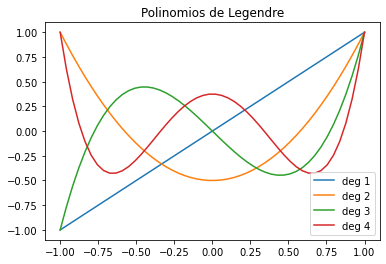

In [27]:
import numpy as np
import matplotlib.pyplot as plt
dom = np.linspace(-1,1)
fig, ax = plt.subplots()
for k in range(1,5):
    pk = sy.lambdify(x, p_k(k), "numpy")
    ax.plot(dom, pk(dom), label=f"deg {k}")
ax.set_title("Polinomios no normalizados de Legendre")
plt.legend(loc='lower right')
plt.show()


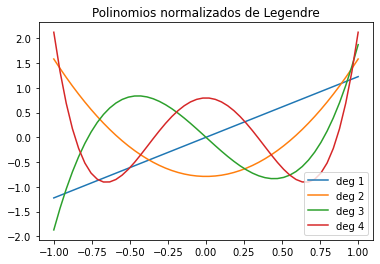

In [30]:
import numpy as np
import matplotlib.pyplot as plt
dom = np.linspace(-1,1)
fig, ax = plt.subplots()
for k in range(1,5):
    ek = sy.lambdify(x, e_k(k), "numpy")
    ax.plot(dom, ek(dom), label=f"deg {k}")
ax.set_title("Polinomios normalizados de Legendre")
plt.legend(loc='lower right')
plt.show()

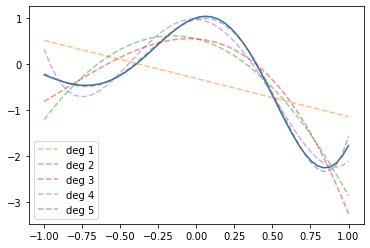

In [33]:
import numpy as np
import matplotlib.pyplot as plt

f_expr = sy.exp(x) * sy.cos(4*x)
f = sy.lambdify(x, f_expr, "numpy")
dom = np.linspace(-1,1)
fig, ax = plt.subplots()
ax.plot(dom, f(dom))
for k in range(1, 6, 1):
    P = polyProjLegendreFunc(f_expr, k)
    ax.plot(dom, P(dom), label=f"deg {k}", linestyle='--', alpha=0.5)
plt.legend(loc='lower left')
plt.show()